# SAT Participation: Insights & Recommendations




## Problem Statement

 In 2017, the SAT had an average participation rate of 20% when compared to ACT of 65%. This subsequently changed to 46% and 62% respectively in 2018. Despite SAT becoming increasingly popular, ACT still remains the majority choice of states. 


## Executive Summary

ACT was popular than SAT among US states for 2014-15 and in 2010 College Board started to think about strategies to increase SAT participation among the individual states.
An aggregate data set of SAT and ACT from 2017 an 2018 is analysed to come up with some solutions. 


### Contents:
- [2017 Data Import & Cleaning](#Data-Import-and-Cleaning)
- [2018 Data Import and Cleaning](#2018-Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

**If you combine your problem statement, executive summary, data dictionary, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.** Don't forget to cite your data sources!

*All libraries used should be added here*

In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

## 2017 Data Import and Cleaning

#### 1. Read In SAT & ACT  Data

Read in the `sat_2017.csv` and `act_2017.csv` files and assign them to appropriately named pandas dataframes.

In [2]:
#Reading in the files.
sat_2017=pd.read_csv('../data/sat_2017.csv')
act_2017=pd.read_csv('../data/act_2017.csv')

#### 2. Display Data

Print the first 10 rows of each dataframe to your jupyter notebook

In [3]:
#print first 10 rows for each dataframe.
sat_2017.head(10)
act_2017.head(10)

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4
5,California,31%,22.5,22.7,23.1,22.2,22.8
6,Colorado,100%,20.1,20.3,21.2,20.9,20.8
7,Connecticut,31%,25.5,24.6,25.6,24.6,25.2
8,Delaware,18%,24.1,23.4,24.8,23.6,24.1
9,District of Columbia,32%,24.4,23.5,24.9,23.5,24.2


#### 3. Verbally Describe Data

Take your time looking through the data and thoroughly describe the data in the markdown cell below. 

Mean state SAT and ACT Scores in year 2017 together with individual mean state participation rates.

#### 4a. Does the data look complete? 

ACT dataframe's first row shows the national mean values of each column while the information is missing from SAT dataframe.

#### 4b. Are there any obvious issues with the observations?

**What is the minimum *possible* value for each test/subtest? What is the maximum *possible* value?**

Consider comparing any questionable values to the sources of your data:
- [SAT](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/)
- [ACT](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows)

In [4]:
#Finding min and max SAT score for each column
sat_2017.max()
sat_2017.min()
#Finding more information for the minimum Math score 
sat_2017[sat_2017.Math==sat_2017.Math.min()]

,State,Participation,Evidence-Based Reading and Writing,Math,Total
20,Maryland,69%,536,52,1060


In [5]:
#Finding min and max ACT score for each column
act_2017.max()
act_2017.min()
#Finding more information for the minimum Science score 
act_2017[act_2017.Science==act_2017.Science.min()]

,State,Participation,English,Math,Reading,Science,Composite
21,Maryland,28%,23.3,23.1,24.2,2.3,23.6


#### 4c. Fix any errors you identified

**The data is available** so there's no need to guess or calculate anything. If you didn't find any errors, continue to the next step.

In [6]:
#Fixing the error in data
sat_2017.loc[20, 'Math'] = 524
act_2017.loc[21, 'Science'] = 23

#### 5. What are your data types? 
Display the data types of each feature. 

In [7]:
#Display the data types of each feature for SAT and ACT.
sat_2017.info()
act_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   State                               51 non-null     object
 1   Participation                       51 non-null     object
 2   Evidence-Based Reading and Writing  51 non-null     int64 
 3   Math                                51 non-null     int64 
 4   Total                               51 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          52 non-null     object 
 1   Participation  52 non-null     object 
 2   English        52 non-null     float64
 3   Math           52 non-null     float64
 4   Reading        52 non-null   

What did you learn?
- Do any of them seem odd?  
- Which ones are not as they should be?  

**Answer**
Data type of both SAT and ACT participation rate is object.. The same problem is for the data type of ACT Composite scores.

#### 6. Fix Incorrect Data Types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert participation rates to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

In [8]:
#A function to convert participation rate column type to integer
def convert_participation_to_integer(dataframe,column):
    dataframe[column]=list(map(lambda x: int(x.strip('%')), dataframe[column]))

In [9]:
#Converting participation rate column type to integer for SAT and ACT dataframes
convert_participation_to_integer(sat_2017,'Participation')
convert_participation_to_integer(act_2017,'Participation')

- Fix any individual values preventing other columns from being the appropriate type.

In [10]:
#Convert Composite datatype to float
act_2017.loc[51,'Composite']=act_2017.loc[51,'Composite'].strip('x')
act_2017["Composite"] = pd.to_numeric(act_2017["Composite"], errors='coerce')

- Finish your data modifications by making sure the columns are now typed appropriately.

- Display the data types again to confirm they are correct.

In [11]:
#Display the data types of each feature for SAT and ACT.
sat_2017.info()
act_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   State                               51 non-null     object
 1   Participation                       51 non-null     int64 
 2   Evidence-Based Reading and Writing  51 non-null     int64 
 3   Math                                51 non-null     int64 
 4   Total                               51 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 2.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          52 non-null     object 
 1   Participation  52 non-null     int64  
 2   English        52 non-null     float64
 3   Math           52 non-null     float64
 4   Reading        52 non-null   

#### 7. Rename Columns
Change the names of the columns to more expressive names so that you can tell the difference the SAT columns and the ACT columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these data with some of the data from 2018, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).

In [12]:
#Renaming SAT columns
sat_2017.columns=['sat17_'+item.lower().replace('-','_').replace(' ','_') if (item!='State') else 'state' for item in sat_2017.columns]
sat_2017.columns

Index(['state', 'sat17_participation',
       'sat17_evidence_based_reading_and_writing', 'sat17_math',
       'sat17_total'],
      dtype='object')

In [13]:
#Renaming ACT columns
act_2017.columns=['act17_'+item.lower().replace('-','_').replace(' ','_') if (item!='State') else 'state' for item in act_2017.columns]
act_2017.columns

Index(['state', 'act17_participation', 'act17_english', 'act17_math',
       'act17_reading', 'act17_science', 'act17_composite'],
      dtype='object')

#### 8. Create a data dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

|Feature|Type|Dataset|Description|
|---|---|---|---|
|state|object|SAT_2017|Sates of participants in SAT 2017| 
|sat17_participation|int|SAT_2017|Participation rate in SAT 2017|
|sat17_evidence_based_reading_and_writing|int|SAT_2017|Average score per state for evidence based reading and writing in SAT 2017|
|sat17_math|int|SAT_2017|Average score per state for Mathematics in SAT 2017|
|sat17_total|int|SAT_2017|Average total score per state in SAT 2017
|||||

|Feature|Type|Dataset|Description|
|---|---|---|---|
|state|object|ACT_2017|Sates of participants in ACT 2017| 
|act17_participation|int|ACT_2017|Participation rate in ACT 2017|
|act17_english|float|ACT_2017|Average score per state for English in ACT 2017|
|act17_math|float|ACT_2017|Average score per state for Mathematics in ACT 2017|
|act17_reading|float|ACT_2017|Average score per state for Reading in ACT 2017|
|act17_science|float|ACT_2017|Average score per state for Sciences in SAT 2017|
|act17_composite|float|ACT_2017|Average score per state for Composite in SAT 2017|

#### 9. Drop unnecessary rows

One of our dataframes contains an extra row. Identify and remove this from the dataframe.

In [14]:
#Remove the national average row from ACT dataframe
act_2017 = act_2017.drop(0)
act_2017.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 1 to 51
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   state                51 non-null     object 
 1   act17_participation  51 non-null     int64  
 2   act17_english        51 non-null     float64
 3   act17_math           51 non-null     float64
 4   act17_reading        51 non-null     float64
 5   act17_science        51 non-null     float64
 6   act17_composite      51 non-null     float64
dtypes: float64(5), int64(1), object(1)
memory usage: 3.2+ KB


#### 10. Merge Dataframes

Join the 2017 ACT and SAT dataframes using the state in each dataframe as the key. Assign this to a new variable.

In [15]:
#Join the 2017 ACT and SAT dataframes using the state in each dataframe as the key.
act_sat_2017=pd.merge(sat_2017,act_2017,on='state')
act_sat_2017.head()

,state,sat17_participation,sat17_evidence_based_reading_and_writing,sat17_math,sat17_total,act17_participation,act17_english,act17_math,act17_reading,act17_science,act17_composite
0,Alabama,5,593,572,1165,100,18.9,18.4,19.7,19.4,19.2
1,Alaska,38,547,533,1080,65,18.7,19.8,20.4,19.9,19.8
2,Arizona,30,563,553,1116,62,18.6,19.8,20.1,19.8,19.7
3,Arkansas,3,614,594,1208,100,18.9,19.0,19.7,19.5,19.4
4,California,53,531,524,1055,31,22.5,22.7,23.1,22.2,22.8


#### 11. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_2017.csv`.

In [16]:
#Saving the merged dataframe.
act_sat_2017.to_csv('../data/combined_2017.csv',index=None,header=True)

## 2018 Data Import and Cleaning

Links to the 2018 ACT and SAT data are provided in the README. These data live in PDFs, and so you'll get to enjoy practicing some *manual* data collection. Save these data as a CSV in your `data` directory, and import, explore, and clean these data in the same way you did above. **Make sure you comment on your steps so it is clear *why* you are doing each process**.

In [17]:
#Reading the 2018 SAT and ACT dataframe.
sat_2018=pd.read_csv('../data/sat_2018.csv')
act_2018=pd.read_csv('../data/act_2018.csv')

In [18]:
#Checking the first few rows for both the dataframe
sat_2018.head()
act_2018.head()
#Checking each column data types
sat_2018.info()
act_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   State                               51 non-null     object
 1   Participation                       51 non-null     object
 2   Evidence-Based Reading and Writing  51 non-null     int64 
 3   Math                                51 non-null     int64 
 4   Total                               51 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          52 non-null     object 
 1   Participation  52 non-null     object 
 2   Composite      52 non-null     float64
dtypes: float64(1), object(2)
memory usage: 1.3+ KB


In [19]:
#Changing the Participation column data type from object to integer.
sat_2018['Participation']=list(map(lambda x:int(x.strip("%")),sat_2018['Participation']))
act_2018['Participation']=list(map(lambda x:int(x.strip("%")),act_2018['Participation']))

In [20]:
#Renaming ACT columns
act_2018.columns=["act18_"+item.lower() if (item!='State') else 'state' for item in act_2018.columns]

In [21]:
#Renaming SAT columns
sat_2018.columns=['sat18_'+item.lower().replace("-","_").replace(" ","_") if (item!='State') else 'state' for item in sat_2018.columns]

In [22]:
#Renaming 'District of columbia' to 'District of Columbia for ACT 
act_2018.at[8,'state']= 'District of Columbia'

In [23]:
#Remove duplicate rows.
act_2018=act_2018.drop_duplicates()

In [24]:
#Merge SAT and ACT dataframe.
act_sat_2018=pd.merge(sat_2018,act_2018,on='state')
act_sat_2018.head()

,state,sat18_participation,sat18_evidence_based_reading_and_writing,sat18_math,sat18_total,act18_participation,act18_composite
0,Alabama,6,595,571,1166,100,19.1
1,Alaska,43,562,544,1106,33,20.8
2,Arizona,29,577,572,1149,66,19.2
3,Arkansas,5,592,576,1169,100,19.4
4,California,60,540,536,1076,27,22.7


In [25]:
#Save SAT ACT 2018 merged dataframe.
act_sat_2018.to_csv('../data/combined_2018.csv',index=None,header=True)

#### Combine your 2017 and 2018 data into a single dataframe
Joining on state names should work, assuming you formatted all your state names identically. Make sure none of your columns (other than state) have identical names. Do yourself a favor and decide if you're encoding participation rates as floats or integers and standardize this across your datasets.

Save the contents of this merged dataframe as `final.csv`.

**Use this combined dataframe for the remainder of the project**.

In [26]:
#Combine 2017 and 2018 dataframe and displaying.
final=pd.merge(act_sat_2018,act_sat_2017,on='state')
final.info()
final.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 50
Data columns (total 17 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   state                                     51 non-null     object 
 1   sat18_participation                       51 non-null     int64  
 2   sat18_evidence_based_reading_and_writing  51 non-null     int64  
 3   sat18_math                                51 non-null     int64  
 4   sat18_total                               51 non-null     int64  
 5   act18_participation                       51 non-null     int64  
 6   act18_composite                           51 non-null     float64
 7   sat17_participation                       51 non-null     int64  
 8   sat17_evidence_based_reading_and_writing  51 non-null     int64  
 9   sat17_math                                51 non-null     int64  
 10  sat17_total                             

,state,sat18_participation,sat18_evidence_based_reading_and_writing,sat18_math,sat18_total,act18_participation,act18_composite,sat17_participation,sat17_evidence_based_reading_and_writing,sat17_math,sat17_total,act17_participation,act17_english,act17_math,act17_reading,act17_science,act17_composite
0,Alabama,6,595,571,1166,100,19.1,5,593,572,1165,100,18.9,18.4,19.7,19.4,19.2
1,Alaska,43,562,544,1106,33,20.8,38,547,533,1080,65,18.7,19.8,20.4,19.9,19.8
2,Arizona,29,577,572,1149,66,19.2,30,563,553,1116,62,18.6,19.8,20.1,19.8,19.7
3,Arkansas,5,592,576,1169,100,19.4,3,614,594,1208,100,18.9,19.0,19.7,19.5,19.4
4,California,60,540,536,1076,27,22.7,53,531,524,1055,31,22.5,22.7,23.1,22.2,22.8


## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [27]:
#Summary Statistics
final.describe().T

,count,mean,std,min,25%,50%,75%,max
sat18_participation,51.0,45.745098,37.314256,2.0,4.50,52.0,77.50,100.0
sat18_evidence_based_reading_and_writing,51.0,563.686275,47.502627,480.0,534.50,552.0,610.50,643.0
sat18_math,51.0,556.235294,47.772623,480.0,522.50,544.0,593.50,655.0
sat18_total,51.0,1120.019608,94.155083,977.0,1057.50,1098.0,1204.00,1298.0
act18_participation,51.0,61.725490,34.037085,7.0,28.50,66.0,100.00,100.0
act18_composite,51.0,21.496078,2.111583,17.7,19.95,21.3,23.65,25.6
sat17_participation,51.0,39.803922,35.276632,2.0,4.00,38.0,66.00,100.0
sat17_evidence_based_reading_and_writing,51.0,569.117647,45.666901,482.0,533.50,559.0,613.00,644.0
sat17_math,51.0,556.882353,47.121395,468.0,523.50,548.0,599.00,651.0
sat17_total,51.0,1126.098039,92.494812,950.0,1055.50,1107.0,1212.00,1295.0


#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [28]:
#Code to manually calculate standard deviation.
def std_dev (num):
    n=len(num)
    mean=np.mean(num)
    sum=0
    for x in num:
        sum+=(x-mean)**2       
    return ((sum/n)**0.5)

- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`

In [29]:
#Create a dictionary to apply the manually calculated standard deviation function.
sd = {x: std_dev(final[x]) for x in final.columns if final[x].dtypes != object}
sd

{'sat18_participation': 36.946619223539415,
 'sat18_evidence_based_reading_and_writing': 47.03460978357609,
 'sat18_math': 47.30194550378352,
 'sat18_total': 93.22742384464433,
 'act18_participation': 33.70173582041031,
 'act18_composite': 2.090779082141178,
 'sat17_participation': 34.92907076664508,
 'sat17_evidence_based_reading_and_writing': 45.21697020437866,
 'sat17_math': 46.65713364485503,
 'sat17_total': 91.58351056778743,
 'act17_participation': 31.824175751231806,
 'act17_english': 2.3304876369363363,
 'act17_math': 1.9624620273436781,
 'act17_reading': 2.0469029314842646,
 'act17_science': 1.7184526716715494,
 'act17_composite': 2.000786081581989}

In [30]:
#Create a dictionary to apply the numpy's standard deviation function.
sd2 = {x: np.std(final[x]) for x in final.columns if final[x].dtypes != object}
sd2

{'sat18_participation': 36.946619223539415,
 'sat18_evidence_based_reading_and_writing': 47.03460978357609,
 'sat18_math': 47.30194550378352,
 'sat18_total': 93.22742384464433,
 'act18_participation': 33.70173582041031,
 'act18_composite': 2.090779082141178,
 'sat17_participation': 34.92907076664508,
 'sat17_evidence_based_reading_and_writing': 45.21697020437866,
 'sat17_math': 46.65713364485503,
 'sat17_total': 91.58351056778743,
 'act17_participation': 31.824175751231806,
 'act17_english': 2.3304876369363363,
 'act17_math': 1.9624620273436781,
 'act17_reading': 2.0469029314842646,
 'act17_science': 1.7184526716715494,
 'act17_composite': 2.000786081581989}

Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

Standard Deviation calculated from pandas is slightly different from that manually calculated, but is exactly same with nump's std method.

#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which states have the highest and lowest participation rates for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Which states have the highest and lowest mean total/composite scores for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Do any states with 100% participation on a given test have a rate change year-to-year?
- Do any states show have >50% participation on *both* tests either year?

Based on what you've just observed, have you identified any states that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

In [31]:
#States that has the lowest participation rates for SAT 2017.
final.sort_values(by='sat17_participation',ascending=True)[['state','sat17_participation','act17_participation']].head(10)

,state,sat17_participation,act17_participation
34,North Dakota,2,98
24,Mississippi,2,100
15,Iowa,2,67
25,Missouri,3,100
44,Utah,3,100
41,South Dakota,3,80
27,Nebraska,3,84
49,Wisconsin,3,100
23,Minnesota,3,100
50,Wyoming,3,100


In [32]:
#States that has the highest participation rates for SAT 2017
final.sort_values(by='sat17_participation',ascending=False)[['state','sat17_participation','act17_participation']].head()

,state,sat17_participation,act17_participation
8,District of Columbia,100,32
22,Michigan,100,29
6,Connecticut,100,31
7,Delaware,100,18
29,New Hampshire,96,18


In [33]:
#States that has the lowest participation rates  for 2018 SAT
final.sort_values(by='sat18_participation',ascending=True).head()

,state,sat18_participation,sat18_evidence_based_reading_and_writing,sat18_math,sat18_total,act18_participation,act18_composite,sat17_participation,sat17_evidence_based_reading_and_writing,sat17_math,sat17_total,act17_participation,act17_english,act17_math,act17_reading,act17_science,act17_composite
34,North Dakota,2,640,643,1283,98,20.3,2,635,621,1256,98,19.0,20.4,20.5,20.6,20.3
50,Wyoming,3,633,625,1257,100,20.0,3,626,604,1230,100,19.4,19.8,20.8,20.6,20.2
41,South Dakota,3,622,618,1240,77,21.9,3,612,603,1216,80,20.7,21.5,22.3,22.0,21.8
27,Nebraska,3,629,623,1252,100,20.1,3,629,625,1253,84,20.9,20.9,21.9,21.5,21.4
49,Wisconsin,3,641,653,1294,100,20.5,3,642,649,1291,100,19.7,20.4,20.6,20.9,20.5


In [34]:
#States that has the highest participation rates  for 2018 SAT
final.sort_values(by='sat18_participation',ascending=False).head()

,state,sat18_participation,sat18_evidence_based_reading_and_writing,sat18_math,sat18_total,act18_participation,act18_composite,sat17_participation,sat17_evidence_based_reading_and_writing,sat17_math,sat17_total,act17_participation,act17_english,act17_math,act17_reading,act17_science,act17_composite
5,Colorado,100,519,506,1025,30,23.9,11,606,595,1201,100,20.1,20.3,21.2,20.9,20.8
6,Connecticut,100,535,519,1053,26,25.6,100,530,512,1041,31,25.5,24.6,25.6,24.6,25.2
7,Delaware,100,505,492,998,17,23.8,100,503,492,996,18,24.1,23.4,24.8,23.6,24.1
22,Michigan,100,511,499,1011,22,24.2,100,509,495,1005,29,24.1,23.7,24.5,23.8,24.1
12,Idaho,100,508,493,1001,36,22.3,93,513,493,1005,38,21.9,21.8,23.0,22.1,22.3


In [35]:
#States that has the lowest participation rates  for 2017 ACT
final.sort_values(by='act17_participation',ascending=True).head()

,state,sat18_participation,sat18_evidence_based_reading_and_writing,sat18_math,sat18_total,act18_participation,act18_composite,sat17_participation,sat17_evidence_based_reading_and_writing,sat17_math,sat17_total,act17_participation,act17_english,act17_math,act17_reading,act17_science,act17_composite
19,Maine,99,512,501,1013,7,24.0,95,513,499,1012,8,24.2,24.0,24.8,23.7,24.3
29,New Hampshire,96,535,528,1063,16,25.1,96,532,520,1052,18,25.4,25.1,26.0,24.9,25.5
7,Delaware,100,505,492,998,17,23.8,100,503,492,996,18,24.1,23.4,24.8,23.6,24.1
39,Rhode Island,97,513,505,1018,15,24.2,71,539,524,1062,21,24.0,23.3,24.7,23.4,24.0
38,Pennsylvania,70,547,539,1086,20,23.5,65,540,531,1071,23,23.4,23.4,24.2,23.3,23.7


In [36]:
#States that has the highest participation rates  for 2017 ACT
final.sort_values(by='act17_participation',ascending=False).head()

,state,sat18_participation,sat18_evidence_based_reading_and_writing,sat18_math,sat18_total,act18_participation,act18_composite,sat17_participation,sat17_evidence_based_reading_and_writing,sat17_math,sat17_total,act17_participation,act17_english,act17_math,act17_reading,act17_science,act17_composite
0,Alabama,6,595,571,1166,100,19.1,5,593,572,1165,100,18.9,18.4,19.7,19.4,19.2
17,Kentucky,4,630,618,1248,100,20.2,4,631,616,1247,100,19.6,19.4,20.5,20.1,20.0
49,Wisconsin,3,641,653,1294,100,20.5,3,642,649,1291,100,19.7,20.4,20.6,20.9,20.5
44,Utah,4,480,530,1010,100,20.4,3,624,614,1238,100,19.5,19.9,20.8,20.6,20.3
42,Tennessee,6,624,607,1231,100,19.6,5,623,604,1228,100,19.5,19.2,20.1,19.9,19.8


In [37]:
#States that has the lowest participation rates  for 2018 ACT
final.sort_values(by='act18_participation',ascending=True).head()

,state,sat18_participation,sat18_evidence_based_reading_and_writing,sat18_math,sat18_total,act18_participation,act18_composite,sat17_participation,sat17_evidence_based_reading_and_writing,sat17_math,sat17_total,act17_participation,act17_english,act17_math,act17_reading,act17_science,act17_composite
19,Maine,99,512,501,1013,7,24.0,95,513,499,1012,8,24.2,24.0,24.8,23.7,24.3
39,Rhode Island,97,513,505,1018,15,24.2,71,539,524,1062,21,24.0,23.3,24.7,23.4,24.0
29,New Hampshire,96,535,528,1063,16,25.1,96,532,520,1052,18,25.4,25.1,26.0,24.9,25.5
7,Delaware,100,505,492,998,17,23.8,100,503,492,996,18,24.1,23.4,24.8,23.6,24.1
38,Pennsylvania,70,547,539,1086,20,23.5,65,540,531,1071,23,23.4,23.4,24.2,23.3,23.7


In [38]:
#States that has the highest participation rates  for 2018 ACT
final.sort_values(by='act18_participation',ascending=False).head()

,state,sat18_participation,sat18_evidence_based_reading_and_writing,sat18_math,sat18_total,act18_participation,act18_composite,sat17_participation,sat17_evidence_based_reading_and_writing,sat17_math,sat17_total,act17_participation,act17_english,act17_math,act17_reading,act17_science,act17_composite
0,Alabama,6,595,571,1166,100,19.1,5,593,572,1165,100,18.9,18.4,19.7,19.4,19.2
17,Kentucky,4,630,618,1248,100,20.2,4,631,616,1247,100,19.6,19.4,20.5,20.1,20.0
49,Wisconsin,3,641,653,1294,100,20.5,3,642,649,1291,100,19.7,20.4,20.6,20.9,20.5
44,Utah,4,480,530,1010,100,20.4,3,624,614,1238,100,19.5,19.9,20.8,20.6,20.3
42,Tennessee,6,624,607,1231,100,19.6,5,623,604,1228,100,19.5,19.2,20.1,19.9,19.8


In [39]:
#States that has the highest total scores for 2017 SAT
final.sort_values('sat17_total',ascending=False).head()

,state,sat18_participation,sat18_evidence_based_reading_and_writing,sat18_math,sat18_total,act18_participation,act18_composite,sat17_participation,sat17_evidence_based_reading_and_writing,sat17_math,sat17_total,act17_participation,act17_english,act17_math,act17_reading,act17_science,act17_composite
23,Minnesota,4,643,655,1298,99,21.3,3,644,651,1295,100,20.4,21.5,21.8,21.6,21.5
49,Wisconsin,3,641,653,1294,100,20.5,3,642,649,1291,100,19.7,20.4,20.6,20.9,20.5
15,Iowa,3,634,631,1265,68,21.8,2,641,635,1275,67,21.2,21.3,22.6,22.1,21.9
25,Missouri,4,633,629,1262,100,20.0,3,640,631,1271,100,19.8,19.9,20.8,20.5,20.4
16,Kansas,4,633,631,1265,71,21.6,4,632,628,1260,73,21.1,21.3,22.3,21.7,21.7


In [40]:
#States that has the lowest totalscores for 2017 SAT
final.sort_values('sat17_total',ascending=True).head()

,state,sat18_participation,sat18_evidence_based_reading_and_writing,sat18_math,sat18_total,act18_participation,act18_composite,sat17_participation,sat17_evidence_based_reading_and_writing,sat17_math,sat17_total,act17_participation,act17_english,act17_math,act17_reading,act17_science,act17_composite
8,District of Columbia,92,497,480,977,32,23.6,100,482,468,950,32,24.4,23.5,24.9,23.5,24.2
7,Delaware,100,505,492,998,17,23.8,100,503,492,996,18,24.1,23.4,24.8,23.6,24.1
12,Idaho,100,508,493,1001,36,22.3,93,513,493,1005,38,21.9,21.8,23.0,22.1,22.3
22,Michigan,100,511,499,1011,22,24.2,100,509,495,1005,29,24.1,23.7,24.5,23.8,24.1
19,Maine,99,512,501,1013,7,24.0,95,513,499,1012,8,24.2,24.0,24.8,23.7,24.3


In [41]:
#States that has the highest composite scores for 2018 ACT
final.sort_values('act18_composite',ascending=False).head()

,state,sat18_participation,sat18_evidence_based_reading_and_writing,sat18_math,sat18_total,act18_participation,act18_composite,sat17_participation,sat17_evidence_based_reading_and_writing,sat17_math,sat17_total,act17_participation,act17_english,act17_math,act17_reading,act17_science,act17_composite
6,Connecticut,100,535,519,1053,26,25.6,100,530,512,1041,31,25.5,24.6,25.6,24.6,25.2
21,Massachusetts,80,562,563,1125,25,25.5,76,555,551,1107,29,25.4,25.3,25.9,24.7,25.4
29,New Hampshire,96,535,528,1063,16,25.1,96,532,520,1052,18,25.4,25.1,26.0,24.9,25.5
32,New York,79,534,534,1068,27,24.5,67,528,523,1052,31,23.8,24.0,24.6,23.9,24.2
22,Michigan,100,511,499,1011,22,24.2,100,509,495,1005,29,24.1,23.7,24.5,23.8,24.1


In [42]:
#States that has the lowest composite scores for 2018 ACT
final.sort_values('act18_composite',ascending=True).head()

,state,sat18_participation,sat18_evidence_based_reading_and_writing,sat18_math,sat18_total,act18_participation,act18_composite,sat17_participation,sat17_evidence_based_reading_and_writing,sat17_math,sat17_total,act17_participation,act17_english,act17_math,act17_reading,act17_science,act17_composite
28,Nevada,23,574,566,1140,100,17.7,26,563,553,1116,100,16.3,18.0,18.1,18.2,17.8
40,South Carolina,55,547,523,1070,100,18.3,50,543,521,1064,100,17.5,18.6,19.1,18.9,18.7
24,Mississippi,3,630,606,1236,100,18.6,2,634,607,1242,100,18.2,18.1,18.8,18.8,18.6
11,Hawaii,56,480,530,1010,89,18.9,55,544,541,1085,90,17.8,19.2,19.2,19.3,19.0
0,Alabama,6,595,571,1166,100,19.1,5,593,572,1165,100,18.9,18.4,19.7,19.4,19.2


In [43]:
#States that has the highest total scores for 2018 SAT
final.sort_values('sat18_total',ascending=False).head()

,state,sat18_participation,sat18_evidence_based_reading_and_writing,sat18_math,sat18_total,act18_participation,act18_composite,sat17_participation,sat17_evidence_based_reading_and_writing,sat17_math,sat17_total,act17_participation,act17_english,act17_math,act17_reading,act17_science,act17_composite
23,Minnesota,4,643,655,1298,99,21.3,3,644,651,1295,100,20.4,21.5,21.8,21.6,21.5
49,Wisconsin,3,641,653,1294,100,20.5,3,642,649,1291,100,19.7,20.4,20.6,20.9,20.5
34,North Dakota,2,640,643,1283,98,20.3,2,635,621,1256,98,19.0,20.4,20.5,20.6,20.3
15,Iowa,3,634,631,1265,68,21.8,2,641,635,1275,67,21.2,21.3,22.6,22.1,21.9
16,Kansas,4,633,631,1265,71,21.6,4,632,628,1260,73,21.1,21.3,22.3,21.7,21.7


In [44]:
#States that has the lowest total scores for 2018 SAT
final.sort_values('sat18_total',ascending=True).head()

,state,sat18_participation,sat18_evidence_based_reading_and_writing,sat18_math,sat18_total,act18_participation,act18_composite,sat17_participation,sat17_evidence_based_reading_and_writing,sat17_math,sat17_total,act17_participation,act17_english,act17_math,act17_reading,act17_science,act17_composite
8,District of Columbia,92,497,480,977,32,23.6,100,482,468,950,32,24.4,23.5,24.9,23.5,24.2
7,Delaware,100,505,492,998,17,23.8,100,503,492,996,18,24.1,23.4,24.8,23.6,24.1
48,West Virginia,28,513,486,999,65,20.3,14,558,528,1086,69,20.0,19.4,21.2,20.5,20.4
12,Idaho,100,508,493,1001,36,22.3,93,513,493,1005,38,21.9,21.8,23.0,22.1,22.3
44,Utah,4,480,530,1010,100,20.4,3,624,614,1238,100,19.5,19.9,20.8,20.6,20.3


From all the tables above, it shows that when the participation rate for one of the test is higher, that of the other test is lower in a given year and this trend seems to follow for the other year too. And state average for all the subjects in a particular test is higher if the participation rate is lower. It is also noted that if the average score of a particular subject in a test is higher, then all the other subject score for that particular test is also higher. But the subject scores of the other test is lower in that particular year.

In [45]:
#States that have >50% participation on both tests either year
final[(final.act17_participation>50)&(final.sat17_participation>50)]
final[(final.act18_participation>50)&(final.sat18_participation>50)]

,state,sat18_participation,sat18_evidence_based_reading_and_writing,sat18_math,sat18_total,act18_participation,act18_composite,sat17_participation,sat17_evidence_based_reading_and_writing,sat17_math,sat17_total,act17_participation,act17_english,act17_math,act17_reading,act17_science,act17_composite
9,Florida,56,550,549,1099,66,19.9,83,520,497,1017,73,19.0,19.4,21.0,19.4,19.8
10,Georgia,70,542,522,1064,53,21.4,61,535,515,1050,55,21.0,20.9,22.0,21.3,21.4
11,Hawaii,56,480,530,1010,89,18.9,55,544,541,1085,90,17.8,19.2,19.2,19.3,19.0
33,North Carolina,52,554,543,1098,100,19.1,49,546,535,1081,100,17.8,19.3,19.6,19.3,19.1
40,South Carolina,55,547,523,1070,100,18.3,50,543,521,1064,100,17.5,18.6,19.1,18.9,18.7


Among the 51 states, only 5 states has more than 50% participation on both ACT and SAT in the same year. For the rest when the participation rate for one of the test increases, that of the other test decreases.

In [46]:
#States with participation rate of at least 50% and total score of at least 1100 on the SAT in 2018
final[(final['sat18_participation'] > 50) & (final['sat18_total'] > 1100)][['state','sat18_participation','sat18_total','act18_participation','act18_composite']]

,state,sat18_participation,sat18_total,act18_participation,act18_composite
21,Massachusetts,80,1125,25,25.5
45,Vermont,64,1120,24,24.1
46,Virginia,68,1117,24,23.9


In [47]:
#States with participation rate of at least 50% and Composite score of at least 21 on the ACT in 2018
final[(final['act18_participation'] > 50) & (final['act18_composite'] > 21)][['state','act18_participation','act18_composite','sat18_participation','sat18_total']]

,state,act18_participation,act18_composite,sat18_participation,sat18_total
10,Georgia,53,21.4,70,1064
15,Iowa,68,21.8,3,1265
16,Kansas,71,21.6,4,1265
23,Minnesota,99,21.3,4,1298
41,South Dakota,77,21.9,3,1240


The above two tables shows the states that are exceptionally good and doesnt follow the trend of mean scores going down as participation goes up and vice versa. All those states shows high scores even with high participation rates in a particlular test. It is noticable that the participation rate for the other test tend to dip in such cases.

In [48]:
#States with a difference in SAT participation between 2017 and 2018.
final['sat_participation_var']=final['sat18_participation'] - final['sat17_participation']
final.sort_values('sat_participation_var',ascending=False)[['state','sat17_participation',
                                                    'sat18_participation','sat_participation_var','act17_participation','act18_participation']].head()

,state,sat17_participation,sat18_participation,sat_participation_var,act17_participation,act18_participation
13,Illinois,9,99,90,93,43
5,Colorado,11,100,89,100,30
39,Rhode Island,71,97,26,21,15
48,West Virginia,14,28,14,69,65
30,New Jersey,70,82,12,34,31


States in the above table shows **extreme large increase in the SAT participation rate in 2018 when compared with 2017**. Those states shows a reduction in ACT participation. We can see that Illinois made a huge leap in SAT participation rate to 99% in 2018 from 9% in 2017. Colorado also made a similiar jump from 11% in 2017 to 100% in 2018. West Virginia doubled its participation percent from 14% in 2017 to 28% in 2018.

In [49]:
#States with a difference in ACT participation between 2017 and 2018.
final['act_participation_var']=final['act18_participation'] - final['act17_participation']
final.sort_values('act_participation_var',ascending=False)[['state','act17_participation',
                                                    'act18_participation','act_participation_var','sat17_participation','sat18_participation']].head()

,state,act17_participation,act18_participation,act_participation_var,sat17_participation,sat18_participation
36,Ohio,75,100,25,12,18
27,Nebraska,84,100,16,3,3
2,Arizona,62,66,4,30,29
20,Maryland,28,31,3,69,76
37,Oregon,40,42,2,43,48


States in the above table are sorted based on the ACT participation difference. We can see that there are not much increase in ACT participation between 2017 and 2017.

## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

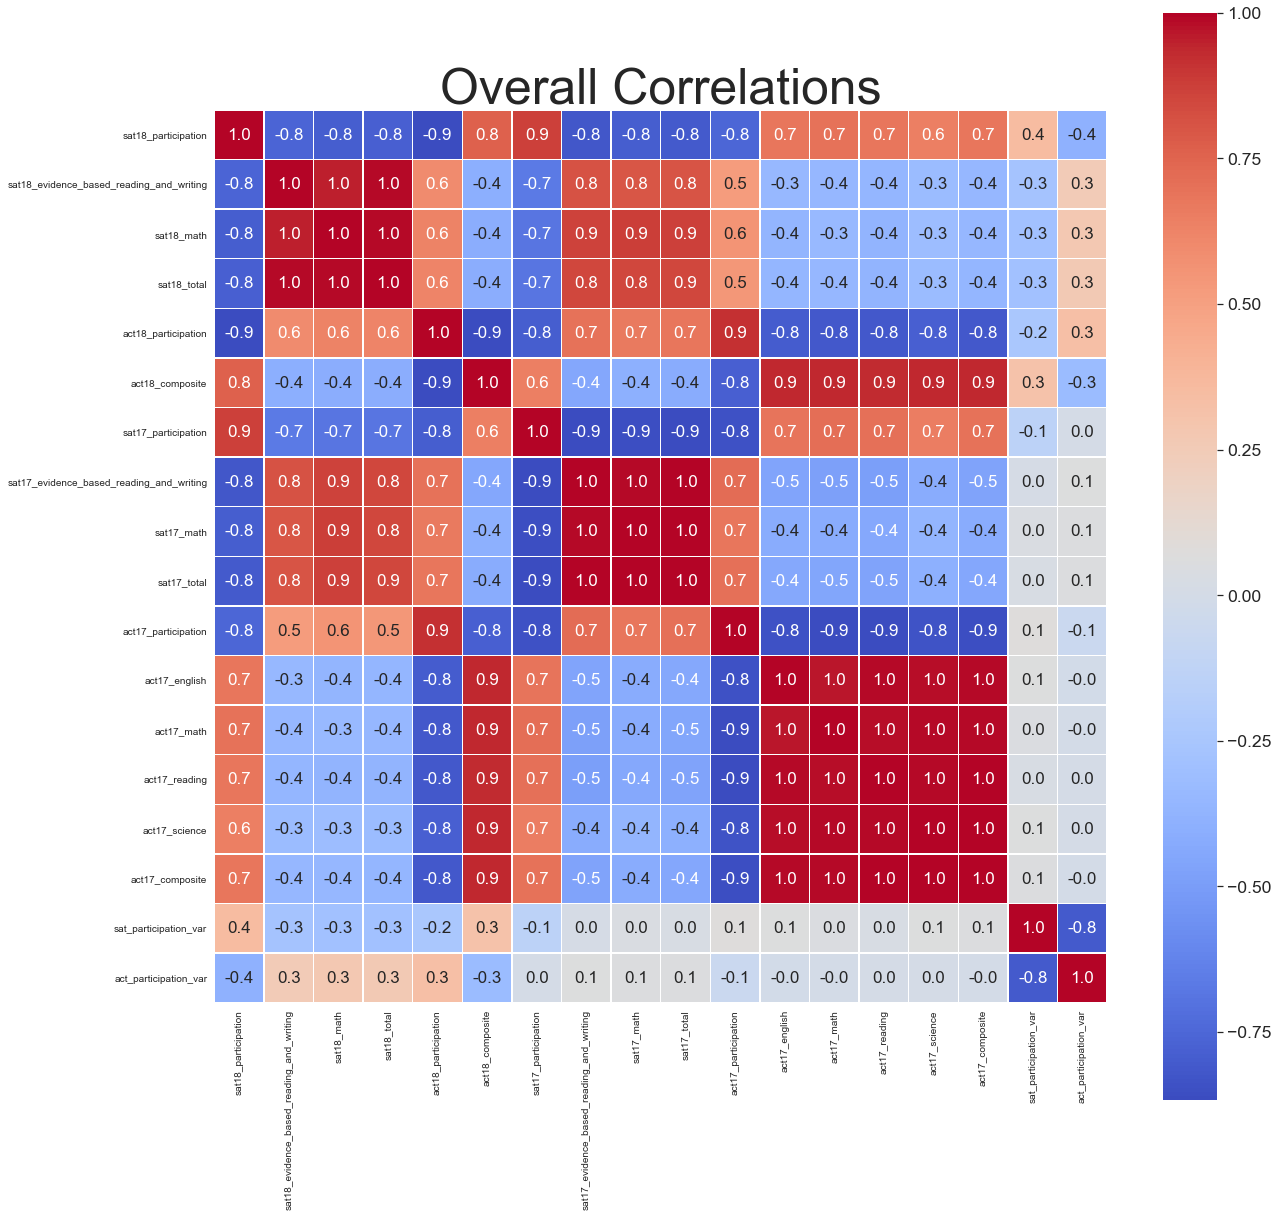

In [50]:
#Plotting the heatmap for Overall Correlation
plt.rcParams['figure.figsize']=(20,20)
ax=plt.axes()
sns.set(font_scale=1.6)
ax=sns.heatmap(final.corr(),annot=True,linewidth=0.5,robust=True,cmap='coolwarm',fmt=".1f",annot_kws={'size':17},square=True)
ax.set_title("Overall Correlations",fontsize=50);


The heatmap above shows that **SAT and ACT participation rates are strongly negatively correlated.** The correlation was -90% for the year 2018 and -80% for the year 2017.That means as the participation rates of SAT increases for a certain year, the participation rates of ACT decreases. It may be because there could be an option to choose either one of the tests.

It also shows that **participation rates and average scores are also negatively correlated for both the years 2017 and 2018.**
It is around -80% for both SAT and ACT for both the years. When theere are more people participating, it could mean that that test is mandatory in that state, thus there are people having variety of talents attending the test, which may result in lower average score. Whereas when the test is an optional in a certain state only people with such talents tends to attend the test and that results in higher scores.

There is **positive correlation between participation rates of same test over the two year.** That means that most of those states where the tests are compulsory or mandatory remains to be the same over the two years.

#### Define a custom function to subplot histograms

We have data for two tests for two years. We only have composite (and not subtest scores) for the 2018 ACT. We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

#### Plot and interpret histograms 
For each of the following:
- Participation rates for SAT & ACT
- Math scores for SAT & ACT
- Reading/verbal scores for SAT & ACT

In [51]:
#Creating a function to plot 4 subplots
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2,figsize=(12,9)) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    #plt.subplot_tool()
    fig.tight_layout(pad=1)
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column])# feel free to add more settings
        # Set titles, labels, etc here for each subplot
        ax[i].set_title(list_of_titles[i])
        ax[i].set_xlabel(list_of_xlabels[i])
        fig.tight_layout(pad=1);

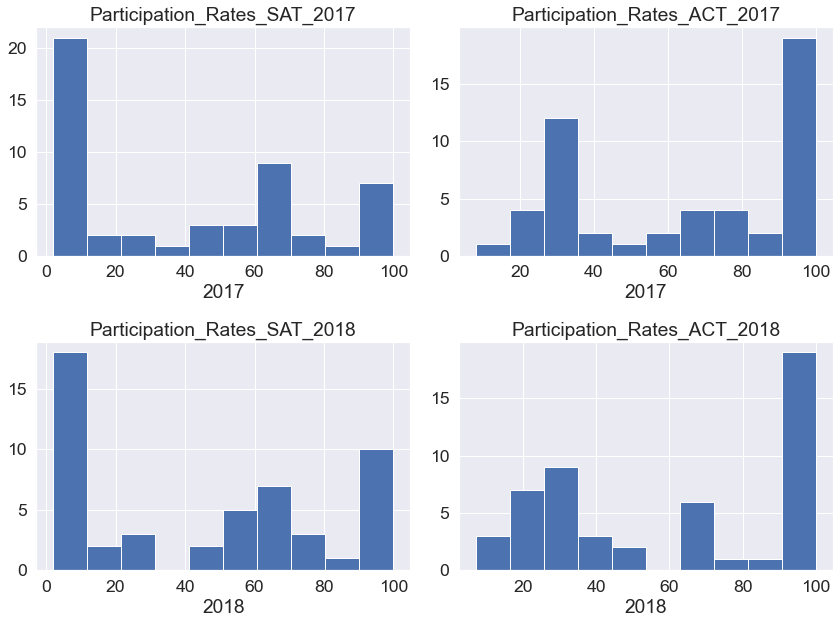

In [52]:
#Plotting Participation rate for SAT and ACT
subplot_histograms(final, ['sat17_participation','act17_participation','sat18_participation','act18_participation'],
                   ['Participation_Rates_SAT_2017','Participation_Rates_ACT_2017','Participation_Rates_SAT_2018','Participation_Rates_ACT_2018'],
                   ['2017','2017','2018','2018'])

The **trends of the participation rate for both SAT and ACT are similiar in both the years.** It is observed that **participation rate of SAT and ACT complementary.** For either tests there are states with **high participation rates or low participation rates.** There are relatively less states with participation rates in between.

SAT has many close to 20 states with <10% participation rate for both the years and ACT on the other hand has close to 20 states with close to 100% participation rates. There is an increase in the number of states with close to 100% participation for SAT in the year 2018.

In [53]:
#Creating a function for 2 subplots
def subplot_histograms_2(dataframe, list_of_columns, list_of_titles, list_of_xlabels):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2,figsize=(12,5)) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    #plt.subplot_tool()
    fig.tight_layout()
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column])# feel free to add more settings
        # Set titles, labels, etc here for each subplot
        ax[i].set_title(list_of_titles[i])
        ax[i].set_xlabel(list_of_xlabels[i])  

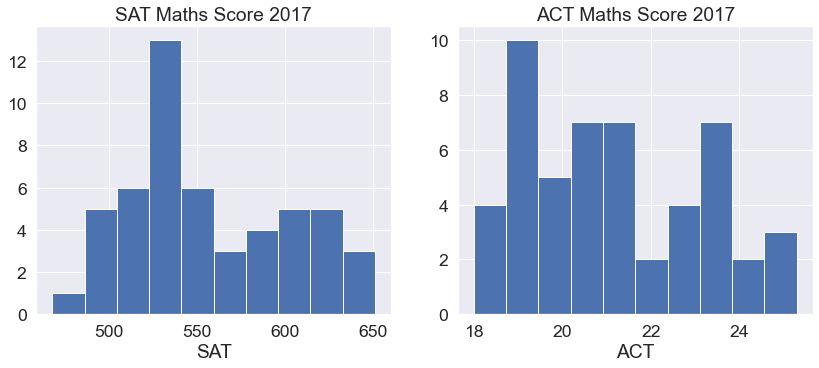

In [54]:
#Creating subplots of SAT and ACT Maths Score 2017
subplot_histograms_2(final,['sat17_math','act17_math'],['SAT Maths Score 2017','ACT Maths Score 2017'],['SAT','ACT'])

We can see that the average Maths SAT score plot is **bimodal distribution**, with two different peaks and slight dip inbetween. Thus there are 2 clusters of states, one cluster with high scores and other cluster with relatively low score.

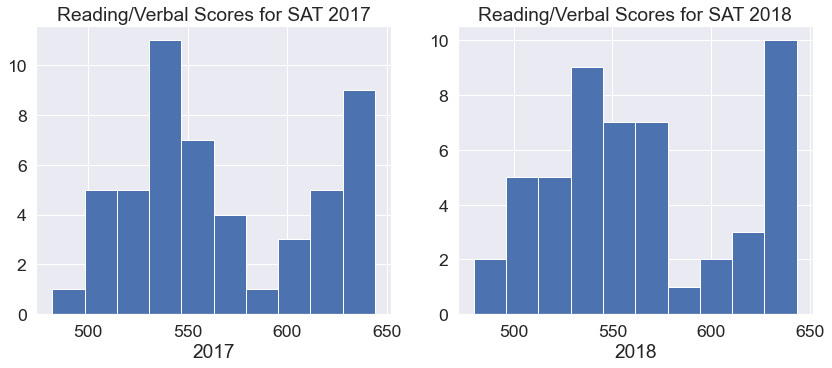

In [55]:
#Creating subplots of SAT Reading/Verbal Score 2017
subplot_histograms_2(final,['sat17_evidence_based_reading_and_writing','sat18_evidence_based_reading_and_writing'],['Reading/Verbal Scores for SAT 2017','Reading/Verbal Scores for SAT 2018'],['2017','2018'])

The distribution of Reading/Verbal SAT score is **bimodal** with 2 clusters of states one with higher score and the other towars the middle. Number of states with very high Reading/Verbal scores for SAT has improved in 2018 when compared with 2017. 
It can also be notable that there are fewer states with high score for Maths when compared with Reading/Verbal in both SAT and ACT.

#### Plot and interpret scatter plots

For each of the following:
- SAT vs. ACT math scores for 2017
- SAT vs. ACT verbal/reading scores for 2017
- SAT vs. ACT total/composite scores for 2017
- Total scores for SAT 2017 vs. 2018
- Composite scores for ACT 2017 vs. 2018

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


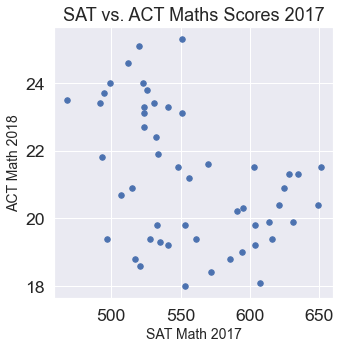

In [56]:
#SAT vs. ACT math scores for 2017
plt.rcParams['figure.figsize']=(5,5)
plt.scatter(x=final['sat17_math'], y=final['act17_math'], marker='o',s=30)
plt.title('SAT vs. ACT Maths Scores 2017',fontsize=18)
plt.xlabel('SAT Math 2017',fontsize=14)
plt.ylabel('ACT Math 2018',fontsize=14);

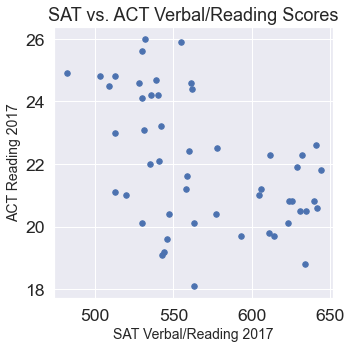

In [57]:
#SAT vs. ACT verbal/reading scores for 2017
plt.rcParams['figure.figsize']=(5,5)
plt.scatter(x=final['sat17_evidence_based_reading_and_writing'], y=final['act17_reading'], marker='o',s=30)
plt.title('SAT vs. ACT Verbal/Reading Scores',fontsize=18)
plt.xlabel('SAT Verbal/Reading 2017',fontsize=14)
plt.ylabel('ACT Reading 2017',fontsize=14);

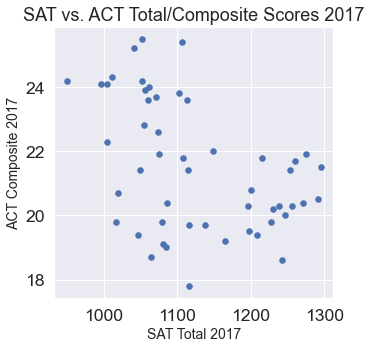

In [58]:
#SAT vs. ACT total/composite scores for 2017
plt.rcParams['figure.figsize']=(5,5)
plt.scatter(x=final['sat17_total'], y=final['act17_composite'], marker='o',s=30)
plt.title('SAT vs. ACT Total/Composite Scores 2017',fontsize=18)
plt.xlabel('SAT Total 2017',fontsize=14)
plt.ylabel('ACT Composite 2017',fontsize=14);

Above scatter plots shows slight **negative correlation between state average scores between SAT and ACT in any year.** This means if the average score for any of the subject in SAT in any year is higher, the average score for ACT in any year is lower and vice versa. One reason for this could be **high ACT score -low ACT paticipation-high SAT participation-low SAT score.**

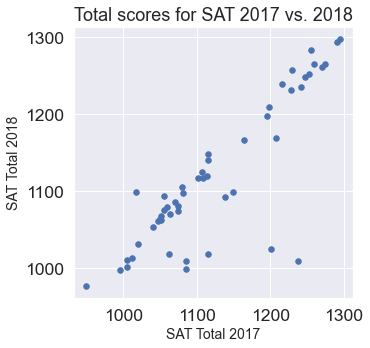

In [59]:
#Total scores for SAT 2017 vs. 2018
plt.rcParams['figure.figsize']=(5,5)
plt.scatter(x=final['sat17_total'], y=final['sat18_total'], marker='o',s=30)
plt.title('Total scores for SAT 2017 vs. 2018',fontsize=18)
plt.xlabel('SAT Total 2017',fontsize=14)
plt.ylabel('SAT Total 2018',fontsize=14);

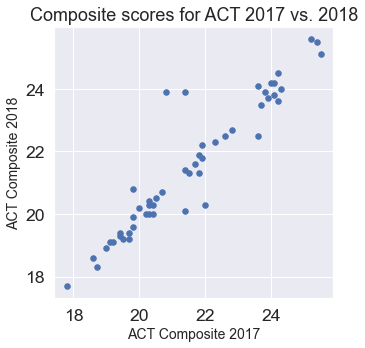

In [60]:
#Composite scores for ACT 2017 vs. 2018
plt.rcParams['figure.figsize']=(5,5)
plt.scatter(x=final['act17_composite'], y=final['act18_composite'], marker='o',s=30)
plt.title('Composite scores for ACT 2017 vs. 2018',fontsize=18)
plt.xlabel('ACT Composite 2017',fontsize=14)
plt.ylabel('ACT Composite 2018',fontsize=14);


There is a **strong positive correlation between scores of same test in 2017 and 2018.** That means the same trend of distribution follows for both SAT and ACT for in the years 2017 and 2018.
But there is a **negative correlation between SAT and ACT scores.** When the SAT scores are higher the ACT scores are lower and vice versa.

#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

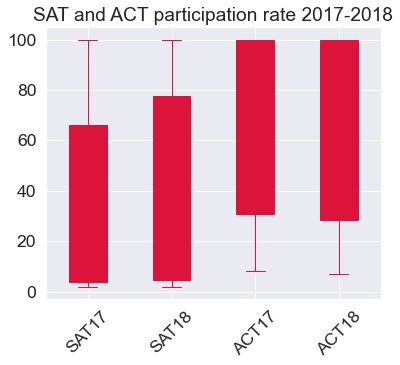

In [61]:
#Boxplot for SAT and ACT participation rate in 2017-2018
plt.figure(figsize=(6,5))
ax=final.boxplot(column=['sat17_participation','sat18_participation','act17_participation','act18_participation'],rot=45,patch_artist=True,color='crimson')
ax.set_title('SAT and ACT participation rate 2017-2018')
plt.xticks([1, 2, 3,4], ['SAT17', 'SAT18', 'ACT17','ACT18']);

The boxplot above shows that **overall participation rate of ACT is more than that of SAT**. Participation rate for SAT in the year 2018 is higher when compared with that of 2017 and the participation rate of ACT in the year 2018 is lower when compared with that of 2017.

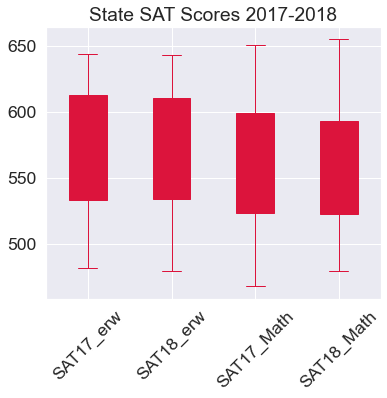

In [62]:
#Boxplot for State SAT Scores 2017-2018
plt.figure(figsize=(6,5))
ax=final.boxplot(column=['sat17_evidence_based_reading_and_writing','sat18_evidence_based_reading_and_writing','sat17_math','sat18_math'],rot=45,patch_artist=True,color='crimson')
ax.set_title('State SAT Scores 2017-2018')
plt.xticks([1, 2, 3,4], ['SAT17_erw', 'SAT18_erw', 'SAT17_Math','SAT18_Math']);

The boxplot above shows that SAT scores for Maths is lower than Evidence based Readinga and Writing in both the years 2017 and 2018. The average Maths SAT score is lower in the year 2018 when compared to the year 2017.

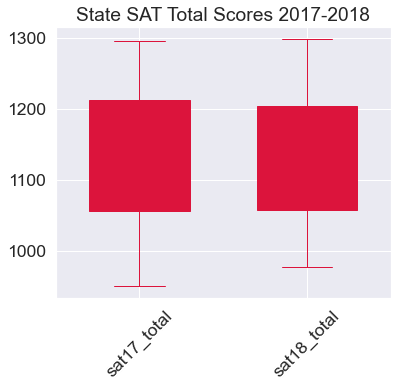

In [63]:
#State SAT Total scores 2017-2018
plt.figure(figsize=(6,5))
ax=final.boxplot(column=['sat17_total','sat18_total'],rot=45,patch_artist=True,color='crimson',widths=0.6)
ax.set_title('State SAT Total Scores 2017-2018');

The boxplot above shows that the average state SAT total scores for 2018 is lower than that for the year 2017.

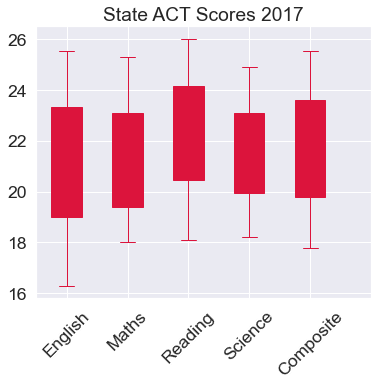

In [64]:
#State ACT individual subject scores 2017
plt.figure(figsize=(6,5))
ax=final.boxplot(column=['act17_english','act17_math','act17_reading','act17_science','act17_composite'],rot=45,patch_artist=True,color='crimson')
ax.set_title('State ACT Scores 2017')
plt.xticks([1, 2, 3,4,5,6], ['English', 'Maths', 'Reading','Science','Composite']);

The boxplot shows the average state ACT scores for different subject for the year 2017. It shows that among all the scores, average scores for Reading is higher than others.

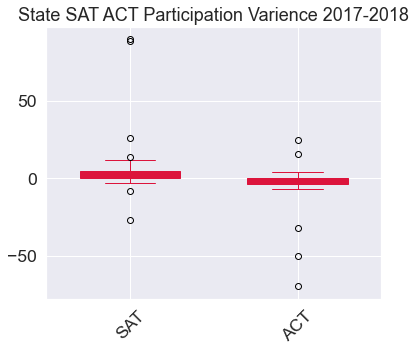

In [65]:
#Score difference for SAT ACT Participation Varience 2017-2018
plt.figure(figsize=(6,5))
ax=final.boxplot(column=['sat_participation_var','act_participation_var'],rot=45,patch_artist=True,color='crimson',widths=0.6)
ax.set_title('State SAT ACT Participation Varience 2017-2018',fontsize=18);
plt.xticks([1, 2], ['SAT', 'ACT']);

The above box plot that shows the difference for SAT and ACT participation rate between the years 2018 and 2017 shows that **SAT has positive overall varience while ACT has negative varience.** That means participation rates for SAT has increased in 2018 when compared with 2017, but that of ACT had decreased. The plot also shows that both SAT and ACT have some outliers. SAT has atleast 2 highly postive outliers that indicates that for those states the SAT participation jumped close to 80% in 2018 when compared to 2017. As shown earlier and in the below table, those postive outliers are **Illinois** and **Colorando** which both have close to 90 participation varience.On the other hand ACT has some negative outliers which shows that the participation rates for 3 states has reduced in 2018.

In [66]:
#States with a difference in SAT participation between 2017 and 2018.
final['sat_participation_var']=final['sat18_participation'] - final['sat17_participation']
final.sort_values('sat_participation_var',ascending=False)[['state','sat17_participation',
                                                    'sat18_participation','sat_participation_var','act17_participation','act18_participation']].head()

,state,sat17_participation,sat18_participation,sat_participation_var,act17_participation,act18_participation
13,Illinois,9,99,90,93,43
5,Colorado,11,100,89,100,30
39,Rhode Island,71,97,26,21,15
48,West Virginia,14,28,14,69,65
30,New Jersey,70,82,12,34,31


#### Feel free to do additional plots below
*(do research and choose your own chart types & variables)*

Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

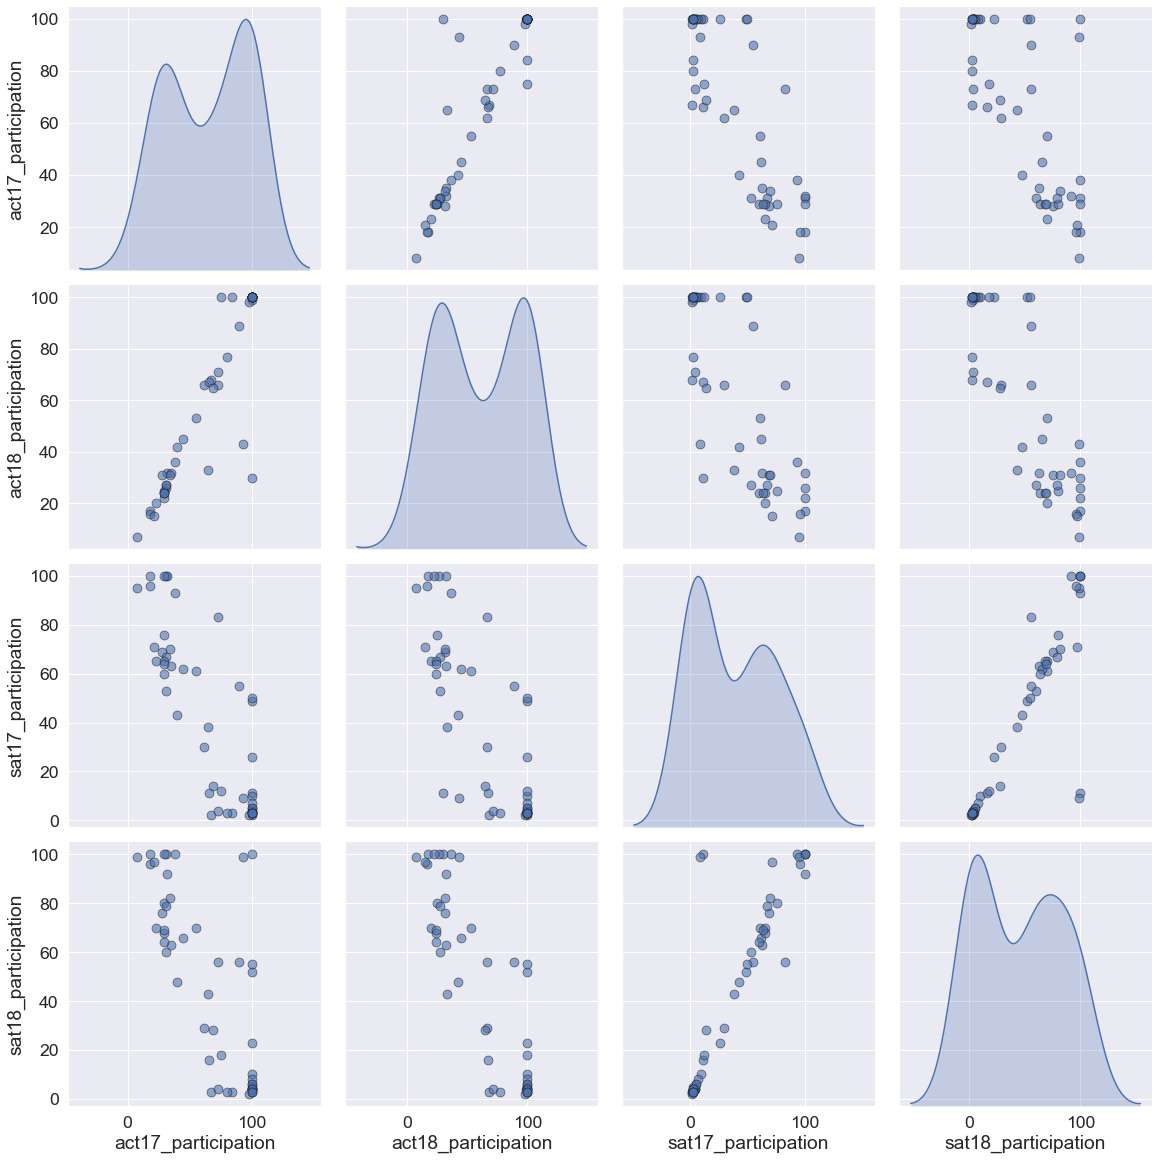

In [67]:
# PairPlots that shows only participation rates of both SAT and ACT in 2017 and 2018.
sns.pairplot(final, 
             vars = ['act17_participation', 'act18_participation', 'sat17_participation','sat18_participation'], diag_kind = 'kde', 
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
             height = 4);

Pair plot of the final dataframe was divided into three subplots for the convenience of visualization. All the three pair plots strongly correlate to the observations states earlier. ACt and SAT participation rates are compliment each other in 2017 and 2018. Participation rates for both SAT and ACT shares the same trends over the years 2017 and 2018. 

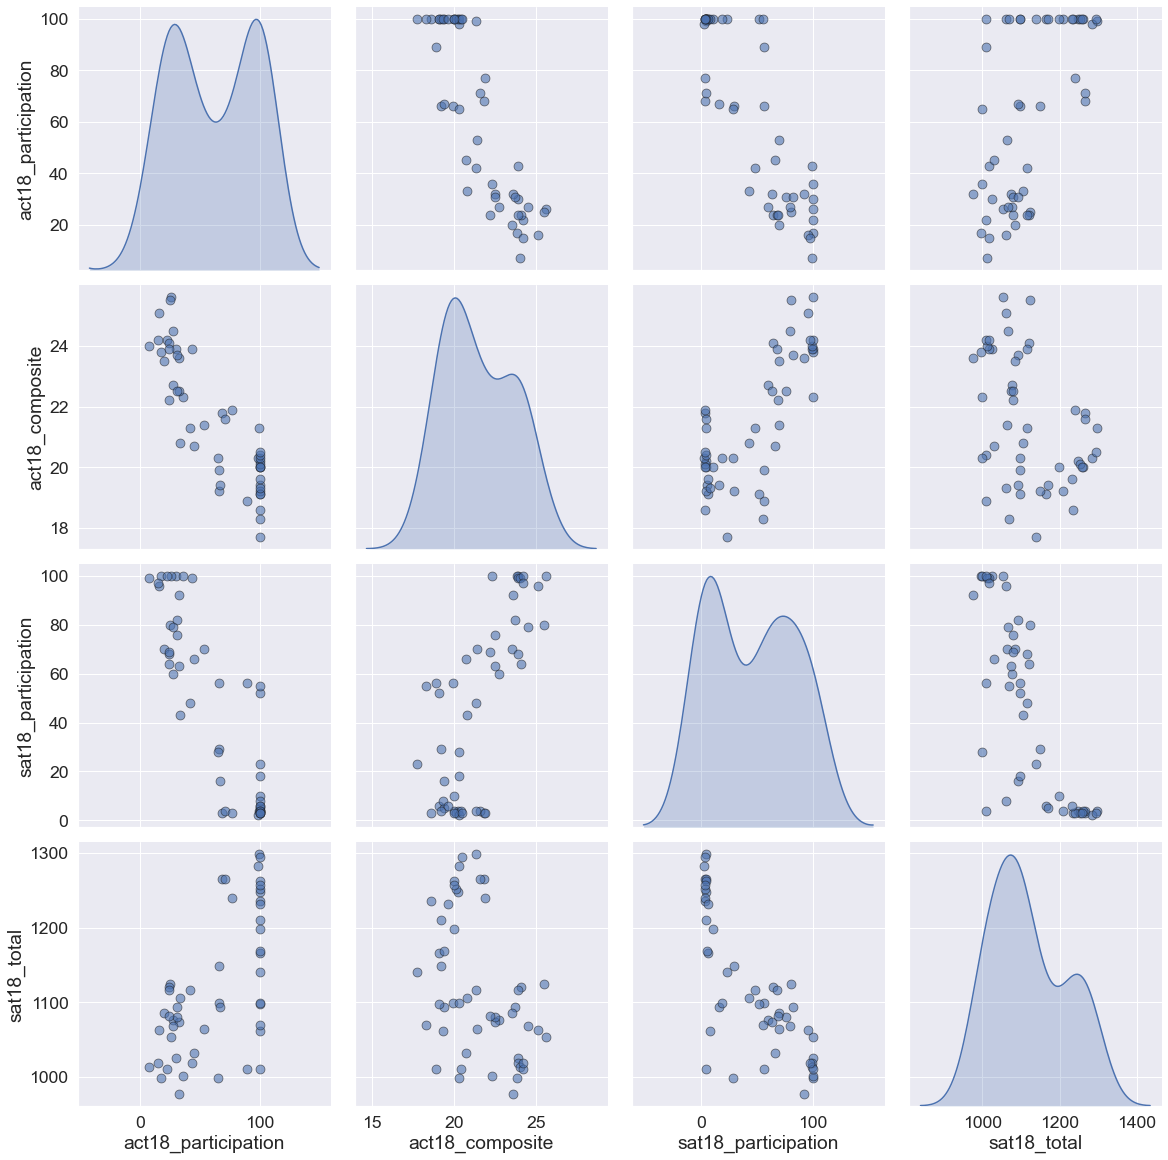

In [68]:
# PairPlots that shows only SAT and ACT participation rate and one subject score in 2018.
sns.pairplot(final, 
             vars = ['act18_participation', 'act18_composite', 'sat18_participation','sat18_total'], diag_kind = 'kde', 
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
             height = 4);

The pairplot above includes ACT and SAT participation and only one subject score in 2018 for the convenience of visualization. We can see that the participation rates of ACT and SAT are complements of each other. As ACT participation rates goes up SAT participation goes down. The above plot also shows the negative correlation between participation rate and subject score for each test, and positive correlation with the test scores of the other subject. It also shows a faint negative correlation between subject score of different tests. For example as ACT Composite score goes up, ACT participation goes down, as ACT participation rates goes down, SAT participation rates goes up. As SAT participation rates goes up, SAT Total score goes down. This is the same trend with other subjects of SAT that are Evidence based Reading and Writing and Maths.  

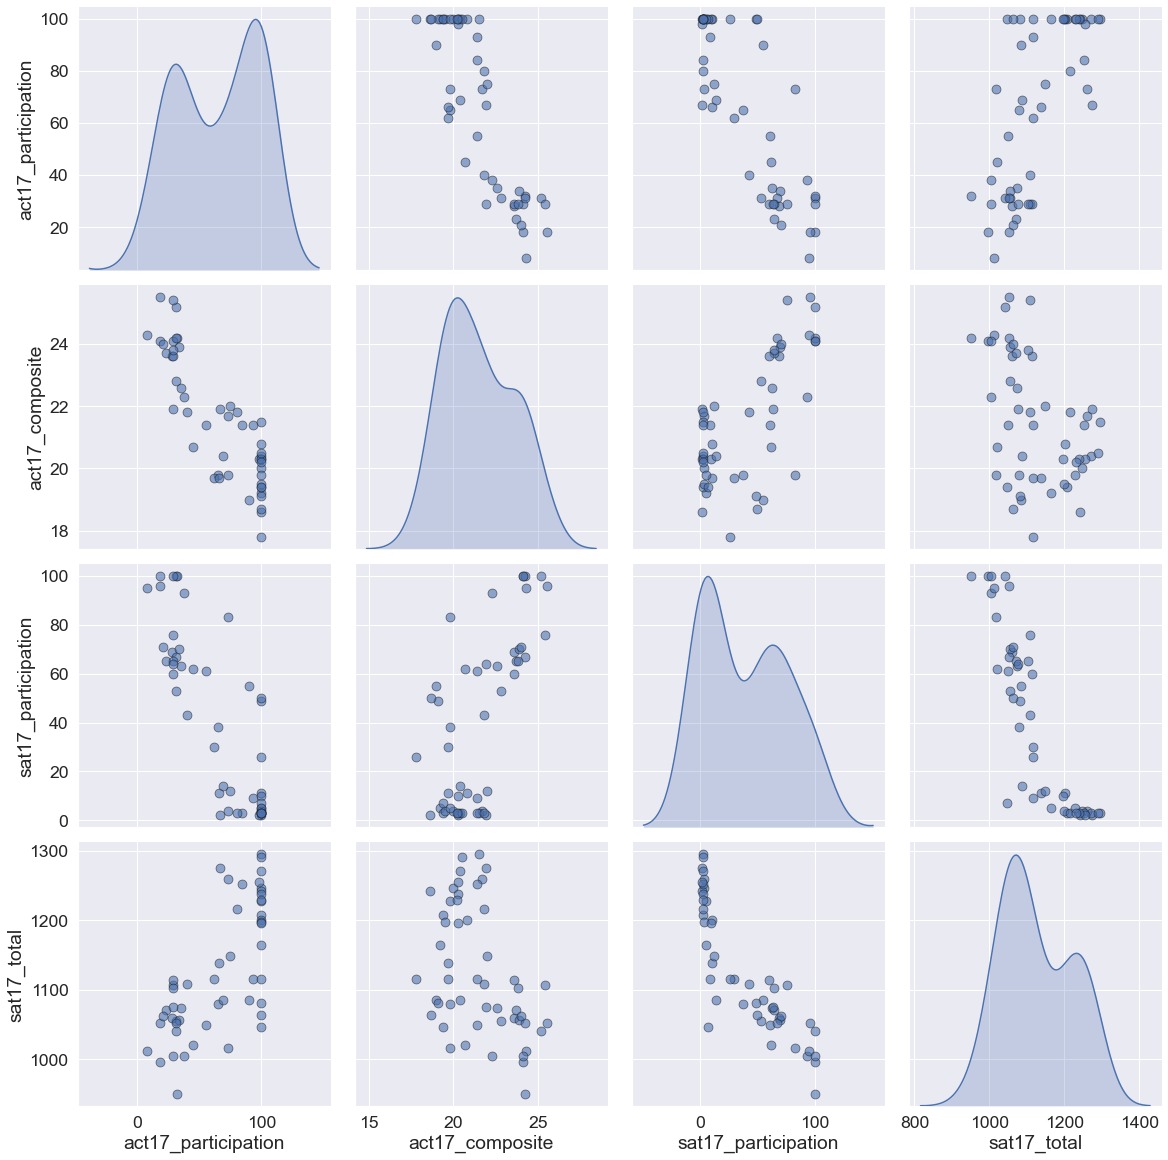

In [69]:
# PairPlots that shows only SAT and ACT in 2017.
sns.pairplot(final, 
             vars = ['act17_participation', 'act17_composite', 'sat17_participation','sat17_total'], diag_kind = 'kde', 
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
             height = 4);

The above plot shows ACT and SAT participation rates in 2017 and one subject score for each of the test. It shares the same trend as 2018. ACT and SAT participation rates are negatively correlated. Partcipation rates and subject score are also negatively correlated for each test. 

When comparing the overall SAT participation among all the states, it is noticed that SAT is gaining its popularity in 2018. But still the participation rates is way lower than ACT. Only **12 states had more than 80% SAT participation rates** in 2018 when compared to 20 states with greater than 80% ACT participation rates. After analysisng the data, it is noticed that inorder to increase the overall SAT participation, we need to see the states that that has low SAT participation rate in the year 2018 and target those states. Thus states with less than 20% SAT participation rates are analysed below.

In [70]:
#States that has the lowest participation rates for 2017 SAT
final[(final['sat18_participation']<20)].sort_values(by='sat18_participation',ascending=True)[['state','sat18_participation','sat17_participation','sat_participation_var','act18_participation']]

,state,sat18_participation,sat17_participation,sat_participation_var,act18_participation
34,North Dakota,2,2,0,98
50,Wyoming,3,3,0,100
15,Iowa,3,2,1,68
24,Mississippi,3,2,1,100
49,Wisconsin,3,3,0,100
27,Nebraska,3,3,0,100
41,South Dakota,3,3,0,77
16,Kansas,4,4,0,71
17,Kentucky,4,4,0,100
18,Louisiana,4,4,0,100


Above are about **20 states that have <20% in SAT participation in both the years.** These are the states that need to be targeted mainly inorder to bring up the overall SAT participation rate. It is noticed that some states has state policies that made either SAT or ACT mandatory. The data is collected and the states are sorted based on which test each state has a mandatory test or not based on the website below.
https://www.testive.com/state-sat-act/

In [79]:
#Sorting based on which test is mandatory in a particlular state.
final['Requirements']=''
for index,row in final.iterrows():
    act_required=['Alabama','Hawaii','Idaho','Kentucky','Louisiana','Missouri','Montana','Nebraska','Nevada','North Carolina','North Dakota','Ohio','South Carolina','Tennessee','Utah','Wisconsin']
    sat_required=['Colorado','Connecticut','Delaware','District of Columbia','Idaho','Illinois','Maine','Michigan','New Hampshire','Ohio','Tennessee']
    if final.at[index,'state'] in act_required:
        final.at[index,'Requirements']='ACT Required'
    elif final.at[index,'state'] in sat_required:   
        final.at[index,'Requirements']='SAT Required'
    else:
        final.at[index,'Requirements']='None Required'

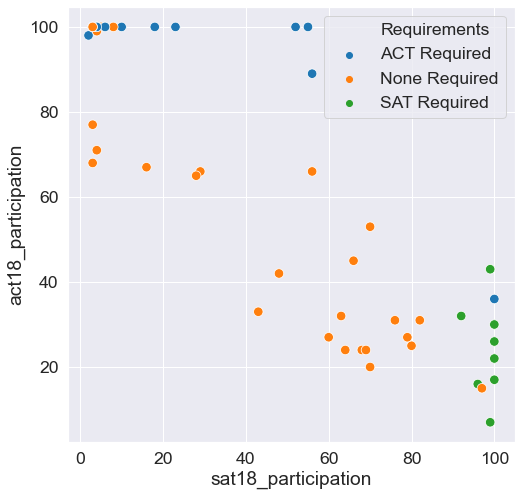

In [72]:
#Display the states based on the test requirements.
plt.figure(figsize=(8,8))
p=sns.scatterplot(data=final,x='sat18_participation',y='act18_participation',hue='Requirements',palette='tab10',s=90)
plt.legend()
plt.show();   

Based on the plot below, we need to target the states on the bottom right corner where SAT participation rate is low and ACT is not required. So those states are those highlighted in blue in the bottom right corner. After the sort, we finally selected 9 states. Those states are listed in the table below. 

In [73]:
#Selecting states with <20% SAT paticipation and where ACT is not compulsory
final[(final['sat18_participation']<20)&(final['Requirements']=='None_Required')]

,state,sat18_participation,sat18_evidence_based_reading_and_writing,sat18_math,sat18_total,act18_participation,act18_composite,sat17_participation,sat17_evidence_based_reading_and_writing,sat17_math,sat17_total,act17_participation,act17_english,act17_math,act17_reading,act17_science,act17_composite,sat_participation_var,act_participation_var,Requirements


Next the number of high school population in each of the above 9 states is collected. Since those are the targeted population who will be participating in either SAT or ACT and the state with the highest high school graduates is selected. This is because working on the **state with largest population** can make a huge and noticable impact. If one of the largest states make such changes, chances are that other states can follow it.

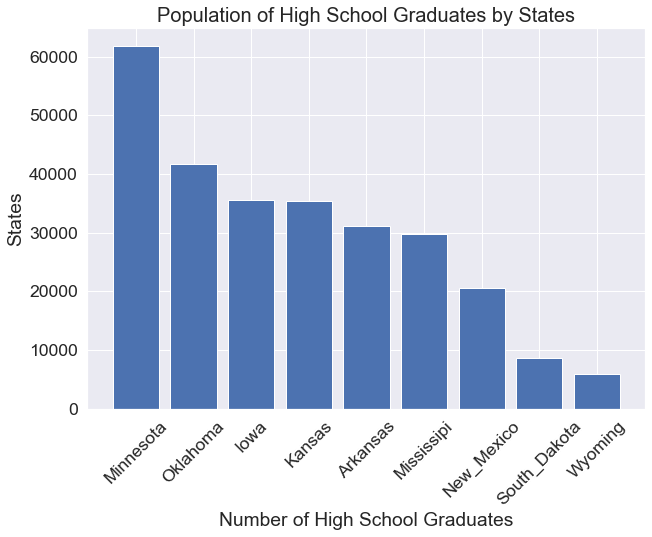

In [74]:
#plotting the 9 selected states vs number of high school graduates in 2018.
plt.figure(figsize=(10,7))
population={
    'Minnesota':61766,
    'Oklahoma':41753,
    'Iowa':35471,
    'Kansas':35398,
    'Arkansas':31126,
    'Mississipi':29788,
    'New_Mexico':20478,
    'South_Dakota':8703,
    'Wyoming':5820  
}
#sns.countplot(data=pop_num)
keys = population.keys()
values = population.values()
plt.bar(keys, values)
plt.xlabel('Number of High School Graduates')
plt.xticks(rotation=45)
plt.ylabel('States')
plt.title('Population of High School Graduates by States',fontsize=20);

Based on the chart above among the 9 states, **Minnesota** has the highest high school graduates in 2018 which is around 61000. Thus this project will target on Minnesota interms of the proposals given.

As a background knowledge of the state Minnesota, legislation passed in 2013 required every high school students to take ACT at the state's expense. Legislation was subsequently removed and it was not a requirement for students to take ACT by the year 2017 and 2018. But ACT became popular and students has been sccustomed to take ACT, which explains the high ACT participation rates even when it was not mandatory. 

When we look at the data there are 2 states Illinois and Colorado made drastic changes in their SAT participation rates in 2018. We made a comparison between those states with Minnesota in the given table.

|Participation Rates|Minnesota|Illinois|Colorado|
|---|---|---|---|
|SAT 2017|3%|9%|11%| 
|SAT 2018|4%|99%(+90%)|100%(+89%)|
|ACT 2017|100%|93%)|100%|
|ACT 2018|99%|43%(-50%|3%(-97%)|
|||||

It is observed from the table that both Illinois and Colorado made a huge jump with their SAT participation rate with around 90% jump. Two factors that contributed to their huge SAT participation rates are **state administration of SAT and introduction of SAT School Day program.** State administartion of SAT makes SAT compulsory in the state at state's expense. SAT School Day is a program to that helps SAT to be easily accessable and also provides financial aids for those taking SAT test.

The main reasons for recommending the state Minnesota is that it has one of the highest high school graduates(around 61000 in 2018), but still it is one of the states with least SAT participation rate, even when SAT gains its popularity among other states.

Our proposals to the Collage Board in terms of increasing SAT participation in Minnesota is as follows:
**State** Since participation rates are largely driven by state policies, it is recommended to establish relationship with state and encorage state administration of states which will make SAT a compulsory test across the state at state's expense. SAT can be used as a standardised metric when measuring education quality of the state.
**Students** Introduce SAT School Day which helps students to easily access SAT at school and also providdes financial aids for the studenst. Increase the awareness that collages value SAT when assessing admission.
**Collages** Inorder to help the state in the big decisions like changing state policies, create support structures by working with the colleges to provide tution/assistence to high school students and this will help students to get used to the different test. SAT can be made as a standard metrics when assessing college admission.

#### (Optional): Using Tableau, create a choropleth map for each variable using a map of the US. 

Save this plot as an image file in an images directory, provide a relative path, and insert the image into notebook in markdown.

## Descriptive and Inferential Statistics

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

In [75]:
final.describe().T

,count,mean,std,min,25%,50%,75%,max
sat18_participation,51.0,45.745098,37.314256,2.0,4.50,52.0,77.50,100.0
sat18_evidence_based_reading_and_writing,51.0,563.686275,47.502627,480.0,534.50,552.0,610.50,643.0
sat18_math,51.0,556.235294,47.772623,480.0,522.50,544.0,593.50,655.0
sat18_total,51.0,1120.019608,94.155083,977.0,1057.50,1098.0,1204.00,1298.0
act18_participation,51.0,61.725490,34.037085,7.0,28.50,66.0,100.00,100.0
act18_composite,51.0,21.496078,2.111583,17.7,19.95,21.3,23.65,25.6
sat17_participation,51.0,39.803922,35.276632,2.0,4.00,38.0,66.00,100.0
sat17_evidence_based_reading_and_writing,51.0,569.117647,45.666901,482.0,533.50,559.0,613.00,644.0
sat17_math,51.0,556.882353,47.121395,468.0,523.50,548.0,599.00,651.0
sat17_total,51.0,1126.098039,92.494812,950.0,1055.50,1107.0,1212.00,1295.0


Looking at the statistics above, for each variable we have mean and median to indicate center, std and quartiles to indicate spread, min and max to indicate the range.
Participation rate for SAT has a mean of 40 in 2017 and 46 in 2018. ACT participation has a mean of 65 in 2017 and 62 in 2018. This shows that SAT has got some gains in the year 2018. Stddevs for both the test are quite high when compared with the mean and in the range 32 to 38. SAT participation rate has median of 38 in 2017 and 52 in 2018 while ACT participation rate has median of 69 in 2017 and 66 in 2018.The histograms of all the participation shows a trimodel which has a 2 peaks at either sides and one near the center thus cause high stdev.

ACT has comparable mean values for all the individual subjects which is between 20.9 to 21.5. The std for all ACT subjects are small and comparable which is between 1.7 and 2.4. Median values are very close to mean(between 0.1 and 0.3), slighly lower which indicates that the spead is almost normal, slighly right skewed.

SAT on the other hand has mean of 569 and 556 in 2017, and 564 and 556 in 2018 for Reading/Writing and Maths respectively. Median is around 10 points lower indicating a normal distribution with a slight right skew.

SAT total score has mean 1126 in 2017 and 1120 in 2018 with std of 92 and 94 respectively. Std is 1107 and 1098 respectively which is slighly lower than its mean which suggest slightly righ skew.
 

#### We generally assuming that data we sample from a population will be normally distributed. Do we observe this trend?

**Answer**
Participation rate for both SAT and ACT in the years 2017 and 2018 doesnt show a normal distribution. The mean and mediam of these variables are not close enough to be normally distribited. Their stddev are very high when compared with the mean value. As shown in the histogram below has is trimodal with 2 peaks on either sides of the dstribution and the third peak near the center. 

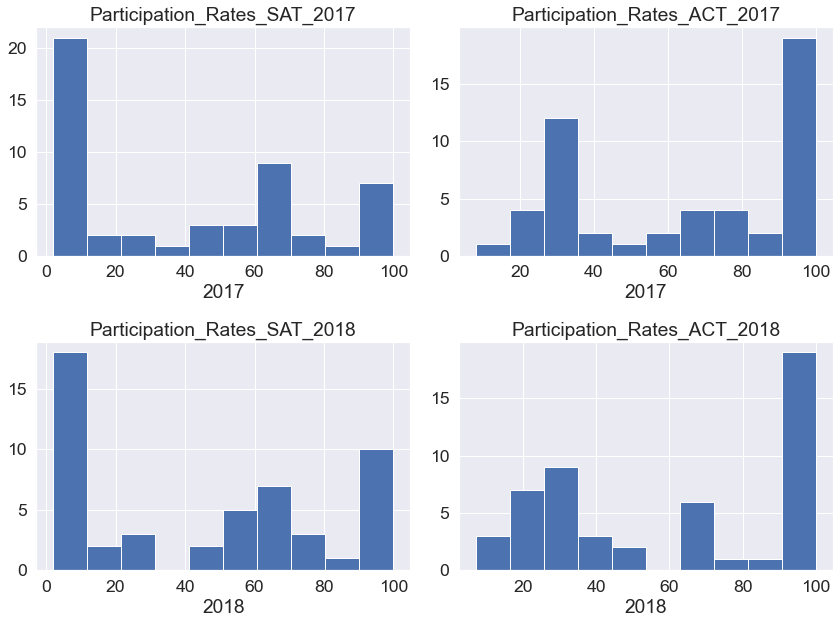

In [76]:
subplot_histograms(final, ['sat17_participation','act17_participation','sat18_participation','act18_participation'],
                   ['Participation_Rates_SAT_2017','Participation_Rates_ACT_2017','Participation_Rates_SAT_2018','Participation_Rates_ACT_2018'],
                   ['2017','2017','2018','2018'])

Does This Assumption Hold for:
    - Math
    - Reading
    - Rates
Explain your answers for each distribution and how you think this will affect estimates made from these data.

**Math** From the statistical score above Maths scores was found to be normal with right skew. Median was slightly lower than mean ans std around 8% of mean. But from the histogram below it has bimodal distribution as shown below with 2 different peaks and a dip in between. **Reading** also has a similiar results, it was found to be slightly right skewed normal distribution using the statistical values above, but from the histogram it too has bimodal distribution.

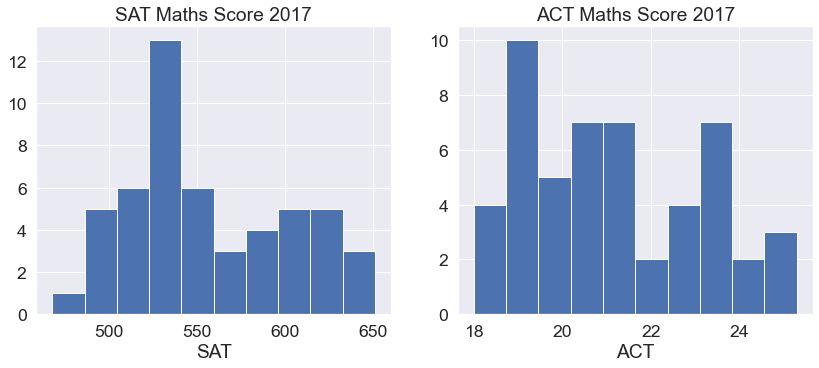

In [77]:
subplot_histograms_2(final,['sat17_math','act17_math'],['SAT Maths Score 2017','ACT Maths Score 2017'],['SAT','ACT'])

#### Estimate Limits of Data

Suppose we only seek to understand the relationship between SAT and ACT participation rates in 2017. 

##### Does it make sense to conduct statistical inference given these data specifically? 

Why or why not?

*(think about granularity, aggregation, the relationships between populations size & rates...consider the actually populations these data describe in answering this question)*

Conducting statistical inference of the sample data helps us to get an idea on the distribution of data among the underlying population to certain extend. But it may loose some details since the data collected are random samples. In case of the SAT and ACT participation, the fact that it has a trimodal distribution is not observed from the statistival calculations alone. But it was observed with the help of histogram. Thus conducting statistical calculations together with some visual plots is the best way to interpret the data.

##### Is it appropriate to compare *these* specific SAT and ACT math scores? 

Why or why not?

In terms of comparing the distribution pattern, we can compare SAT and ACT Math score distribution. Both has bimodal distribution. But since both has different ranges of scores, we cannot compare the raw figures as it is. It may need some normalization before comparing.

#### Statistical Evaluation of Distributions 

**If you feel it's appropriate**, using methods we discussed in class, run hypothesis tests to compare variables of interest in our dataset. 

In [78]:
# Code:

## Outside Research

Based upon your observations, choose **three** states that demonstrate interesting trends in their SAT and/or ACT participation rates. Spend some time doing outside research on state policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

**West Virginia** was one of the states with lowest SAT participation rate in 2017 which was 14%. But in the year 2018 it made an increase in the SAT participation rate to 28% which is 100% increase in poppulation. This increase was due to two main reasons. ACT statewide contract ended in 2018 and West Virginia agreed to cover SAT test costs for all public schools students.
https://www.edweek.org/ew/articles/2018/10/31/sat-scores-rise-as-number-of-test-takers.html


Two other interesting states are **Colorado and Illinois**. Both the states has an increase in the SAT participation rate in the year 2018 compared with the participation rate in 2017. Initially SAT wasnt as widely acceptable as ACT by both the states. Later SAT was redesigned to align with widely accepted standards and the new format of SAT test was quite applealing when compared with its older version, thus increased the SAT participation. Colorado had the SAT participation of 100% in the year 2018 when compared to 11% in the year 2017. Illinois had SAT participation rate of 99% in 2018, when compared to 9% in the year 2017.
https://blog.prepscholar.com/which-states-require-the-sat

## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Choose one state with a lower participation rate and provide a suggestion for how the College Board might increase participation amongst graduating seniors in this state. Are there additional data you desire that would better inform your investigations?

ACT and SAT distribution roughly complements each other which suggests that states may be able to choose between either of the test. ACT has close to 20 states with high participation rates which is close to 100% and around 5 states with low participation rate less than 10%. SAT on the other hand had close to 20 states with participation rates less than 10% and most of the other states with arund 60% participation rate.

Both ACT and SAT scores are strongly negatively correlated with respect to their participation rates since low participation means a group of selective people who are high scorers and high participation rates suggests diluted talents.
The policies of each states affect the participation rates of each tests and it can be noticed that many states prefers one particular test among the two.


SAT made clear gains in 2018 when compared with 2017 where the overall difference in mean state participation rate in 2018 vs 2017 is higher and more state policies choose SAT over ACT. Illinois and Colorado made a significant change from low participation rate close to 10% in 2017 to close to 100% in 2018 and the overall participation gains of SAT is mainly contributed by those states. It is also observed that there are 20 sates with <20% SAT participation rate in 2018. Those are the potential states where significant changes can change the overall SAT participation rates. After opting out the states where ACT is compulsory and after sorting by the number of high school graduates, Minnesota s chosen to be the best fit to target. It would be a better strategy for the College Board to work with the state and encorage state sdministration of SAT where SAT is make compulsory at state's expense. SAT School Day program can also be introduced which helps to increase the accesibility of SAT and provide financial aid. Collage Board can also work with colleges to provide required tuition/assistance to high school students inorder to help students with the transition.

With all the recommendation taken into acton, SAT participation in Minnesota can be increased significantly. Such a change in Minnesota which is a large state with high educational background, can influnce other states also to make such transition. 